In [1]:
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets

# 乱数シード固定
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(0)

In [2]:
# 前処理（テンソルへの変換と正規化）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

# 訓練データ・検証データのダウンロード
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

# データローダの作成
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 41022684.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1091283.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9918541.33it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1314373.45it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



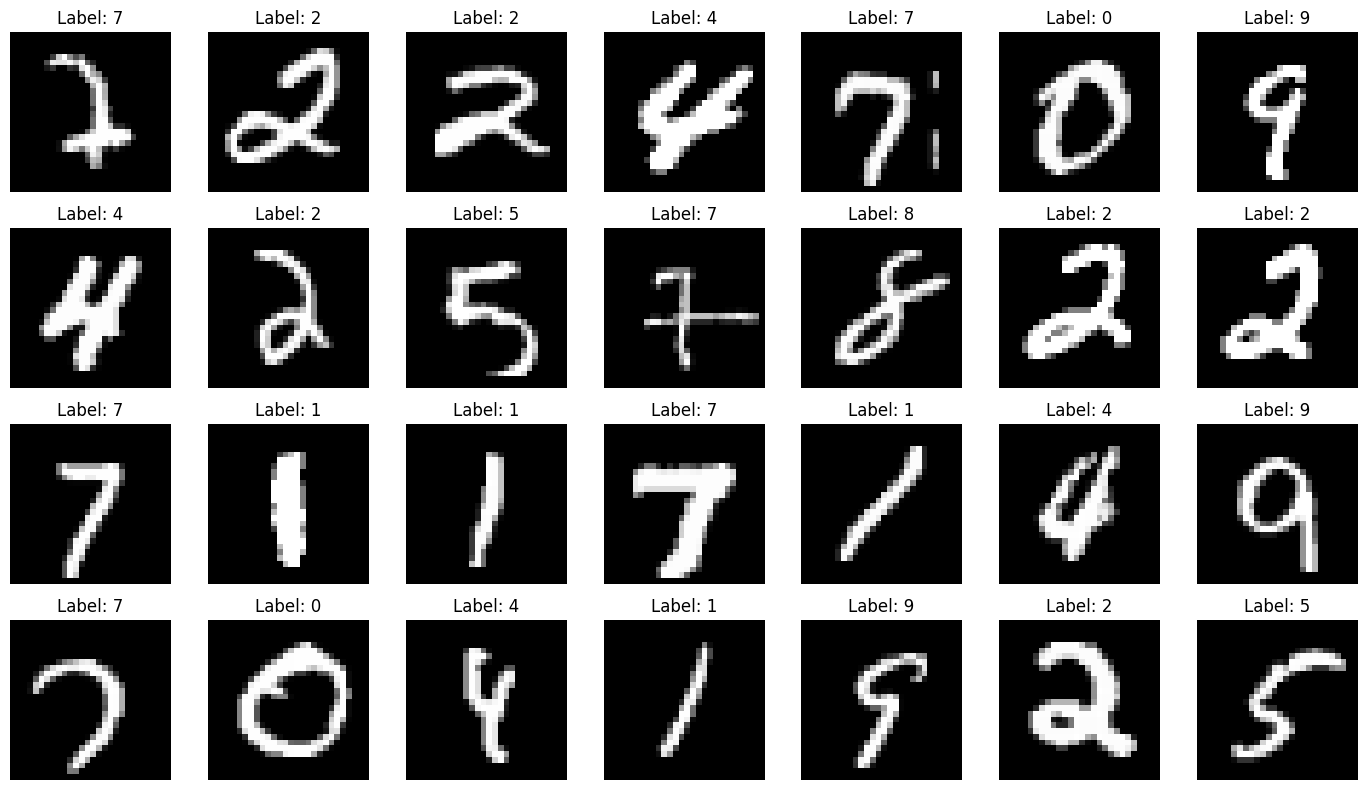

In [3]:
# 画像を表示
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(14, 8))
for i, ax in enumerate(axes.flatten()):
    img = images[i].numpy().squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# モデルの定義
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.Linear(128, 10)
)

# 損失関数・最適化手法の定義
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# 学習
model.train()
num_epochs = 10
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        # 入力, 正解ラベルを取得
        inputs, labels = data

        # 勾配をゼロに初期化
        optimizer.zero_grad()

        # 出力を得る
        outputs = model(inputs)

        # 損失計算から誤差逆伝播により、パラメータを更新する
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 損失を加算
        if (i + 1) % (total_step // 5) == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")
    print(" = = = = = = = = = = = = = = = = = = =")

Epoch [1/10], Step [31/157], Loss: 2.1467
Epoch [1/10], Step [62/157], Loss: 2.0781
Epoch [1/10], Step [93/157], Loss: 1.9462
Epoch [1/10], Step [124/157], Loss: 1.7965
Epoch [1/10], Step [155/157], Loss: 1.6465
 = = = = = = = = = = = = = = = = = = =
Epoch [2/10], Step [31/157], Loss: 1.3912
Epoch [2/10], Step [62/157], Loss: 1.4110
Epoch [2/10], Step [93/157], Loss: 1.3439
Epoch [2/10], Step [124/157], Loss: 1.1644
Epoch [2/10], Step [155/157], Loss: 1.1236
 = = = = = = = = = = = = = = = = = = =
Epoch [3/10], Step [31/157], Loss: 1.1077
Epoch [3/10], Step [62/157], Loss: 0.8627
Epoch [3/10], Step [93/157], Loss: 0.9625
Epoch [3/10], Step [124/157], Loss: 0.7535
Epoch [3/10], Step [155/157], Loss: 0.6793
 = = = = = = = = = = = = = = = = = = =
Epoch [4/10], Step [31/157], Loss: 0.7256
Epoch [4/10], Step [62/157], Loss: 0.8468
Epoch [4/10], Step [93/157], Loss: 0.7235
Epoch [4/10], Step [124/157], Loss: 0.7988
Epoch [4/10], Step [155/157], Loss: 0.7980
 = = = = = = = = = = = = = = = = = 

In [6]:
# テストデータで正解率を計算
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total} %')

Accuracy on the test images: 89.3 %
